In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from scipy import stats

# Métodos combinando diferentes Bases de Datos

A continuaión, abrimos las diferentes encuestas que hemos descargado de cada Base de Datos únicamente con las características seleccionadas por tres o más métodos. Realizamos una combinación de las mismas de tres formas:
* BFS + BUS
* HFS + HUS + BGD
* HFS + HUS + BGD + BDL


BDemoLifeDiabHXMgmt (BDL)

BGeriDepress(BGD)

BHypoFearSurvey (HFS)

BHypoUnawareSurvy ( HUS) 

In [15]:
#Cargamos la base de datos y la guardamos en un dataframe
dataUn= pd.read_excel("BHypoUnawareSurveyFS.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
dataUn.head() # Muestra las primeras 5 filas

,Unnamed: 0,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T
0,0,1,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,1,0,0


In [16]:
#Cargamos la base de datos y la guardamos en un dataframe
dataFe= pd.read_excel("BHypoFearSurveyFS.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
dataFe.head() # Muestra las primeras 5 filas

,Unnamed: 0,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG
0,0,2,1,2
1,1,0,1,2
2,2,1,1,1
3,3,2,1,4
4,4,0,2,2


In [17]:
dataFe = dataFe.rename(columns={'Unnamed: 0':'PtID'})
dataFe.head()

,PtID,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG
0,0,2,1,2
1,1,0,1,2
2,2,1,1,1
3,3,2,1,4
4,4,0,2,2


In [18]:
dataUn = dataUn.rename(columns={'Unnamed: 0':'PtID'})
dataUn.head()

,PtID,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T
0,0,1,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,1,0,0


In [19]:
dataall = pd.merge(dataFe,dataUn, on = "PtID")
dataall.head(30)

,PtID,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T
0,0,2,1,2,1,0,0
1,1,0,1,2,0,0,0
2,2,1,1,1,0,0,0
3,3,2,1,4,0,0,0
4,4,0,2,2,1,0,0
5,5,0,0,0,1,1,0
6,6,0,0,0,0,1,0
7,7,4,4,4,1,0,0
8,8,2,0,2,0,1,0
9,9,0,2,2,0,1,0


In [20]:
#Cargamos la base de datos y la guardamos en un dataframe
datage= pd.read_excel("BGeriDepressFS.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
datage.head() # Muestra las primeras 5 filas

,PtID,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit
0,0,1,1,1,0,1
1,1,0,1,0,1,1
2,2,1,1,1,0,1
3,3,1,1,1,0,1
4,4,1,1,1,0,1


In [21]:
dataall2 = pd.merge(dataall,datage, on = "PtID")
dataall2.head()

,PtID,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit
0,0,2,1,2,1,0,0,1,1,1,0,1
1,1,0,1,2,0,0,0,0,1,0,1,1
2,2,1,1,1,0,0,0,1,1,1,0,1
3,3,2,1,4,0,0,0,1,1,1,0,1
4,4,0,2,2,1,0,0,1,1,1,0,1


In [22]:
dataall_2 = dataall2.drop("PtID", axis = 1)

In [23]:
dataall2

,PtID,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit
0,0,2,1,2,1,0,0,1,1,1,0,1
1,1,0,1,2,0,0,0,0,1,0,1,1
2,2,1,1,1,0,0,0,1,1,1,0,1
3,3,2,1,4,0,0,0,1,1,1,0,1
4,4,0,2,2,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,1,2,4,1,0,0,1,1,1,0,1
197,197,0,0,0,0,0,0,1,1,1,0,1
198,198,0,0,0,1,1,0,1,1,0,0,1
199,199,2,1,2,0,0,0,1,1,1,0,1


In [24]:
#Cargamos la base de datos y la guardamos en un dataframe
datage1= pd.read_excel("MedConditionFS.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
datage1.head() # Muestra las primeras 5 filas

,PtID,Coronary artery disease,Type I diabetes mellitus,Hypertension
0,0,1,0,0
1,1,0,0,1
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [25]:
dataall3 = pd.merge(dataall2,datage1, on = "PtID")
dataall3.head()

,PtID,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit,Coronary artery disease,Type I diabetes mellitus,Hypertension
0,0,2,1,2,1,0,0,1,1,1,0,1,1,0,0
1,1,0,1,2,0,0,0,0,1,0,1,1,0,0,1
2,2,1,1,1,0,0,0,1,1,1,0,1,0,0,0
3,3,2,1,4,0,0,0,1,1,1,0,1,0,0,0
4,4,0,2,2,1,0,0,1,1,1,0,1,0,0,0


In [26]:
dataall_3 = dataall3.drop("PtID", axis = 1)

In [27]:
dataall_3

,WorryNoHelp,WorryLoseCntrl,WorryNotRecLowBG,ModHypoEpPast6Mon_MOM,LowBGSympCat_ALW,SevHypoEpPastYear_8T,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit,Coronary artery disease,Type I diabetes mellitus,Hypertension
0,2,1,2,1,0,0,1,1,1,0,1,1,0,0
1,0,1,2,0,0,0,0,1,0,1,1,0,0,1
2,1,1,1,0,0,0,1,1,1,0,1,0,0,0
3,2,1,4,0,0,0,1,1,1,0,1,0,0,0
4,0,2,2,1,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,2,2,0,0,0,1,0,1,0,1,0,1,1
190,0,0,1,0,1,0,1,0,1,0,1,0,1,1
191,2,0,0,0,1,0,1,1,1,0,1,0,1,1
192,0,1,2,1,0,0,1,1,1,0,1,0,1,1


In [28]:
#Cargamos la base de datos y la guardamos en un dataframe
datademoli= pd.read_excel("BDemoLIfeFS.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
datademoli.head() # Muestra las primeras 5 filas

,PtID,Gender,AnnualInc_$75,EduLevel_Bachelor's Degree
0,0,0,0,0
1,1,1,0,0
2,2,1,0,0
3,3,1,0,0
4,4,1,0,0


In [29]:
dataall4 = pd.merge(datage,datademoli, on = "PtID")
dataall4.head()

,PtID,LifeEmpty,PrefStayHome,MoreMemProb,WondAlive,HopelessSit,Gender,AnnualInc_$75,EduLevel_Bachelor's Degree
0,0,1,1,1,0,1,0,0,0
1,1,0,1,0,1,1,1,0,0
2,2,1,1,1,0,1,1,0,0
3,3,1,1,1,0,1,1,0,0
4,4,1,1,1,0,1,1,0,0


In [30]:
dataall_4 = dataall4.drop("PtID", axis = 1)

In [34]:
data_input_FS = data_input[["WorryNoHelp", "WorryLoseCntrl","WorryNotRecLowBG"]]
data_input_FS2 = data_input[["TestBGRunHigh", "HighBGAlone","EatFirstSignLowBG","RedInsThinkLowBG", "AvoidExThinkLowBG", "CkSugOftMtg", "WorryNotRecLowBG", "WorryPassOut", "WorryEmbarSocial", "WorryReacAlone", "WorryAppStupDrunk", "WorryLoseCntrl", "WorryNoHelp", "WorryReactDrive", "WorryMistAcc", "WorryBadEvalCrit", "WorryRespForOthers"]]
       

# Métodos de ML

In [34]:
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    print(accuracy_score(Y_test, y_output_knn2))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
    Especificidad = tn / (tn + fp)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

In [35]:
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)


    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

In [36]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,seed):
    
    std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))

    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    Especificidad = tn / (tn + fp)

    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)


In [37]:
def regr_Logistica(X_train, X_test, Y_train, Y_test):
    scaler = preprocessing.StandardScaler() #normalizamos
    scalerfit =  scaler.fit(X_train) #fit con los datos de train
    X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 

    # Regresión logística
    regressor = LogisticRegression()

    # Entrenamos el modelo utilizando los datos de train
    regressor_lrm = regressor.fit(X_train_norm, Y_train)

    # Mostramos el intercepto
    print(regressor_lrm.intercept_)

    # Mostramos el valor de los coeficientes
    print(regressor_lrm.coef_)

    # Obtenemos el valor predicho para el conjunto de test
    y_pred_lrm = regressor_lrm.predict(X_test_norm)

    #  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lrm)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrm).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lrm)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lrm, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lrm)
    print(f'Sensibilidad: {Sensibilidad}')
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lrm)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)
    
 #   accuracy.append(Accuracy)
#    sensibilidad.append(Sensibilidad)
    return (Accuracy, Sensibilidad, roc_auc)

In [38]:
def reg_Lasso(X_train, X_test, Y_train, Y_test):
              

    scaler = preprocessing.StandardScaler() #normalizamos
    scalerfit =  scaler.fit(X_train) #fit con los datos de train
    X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    Especificidad = tn / (tn + fp)

    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

# KNN

In [39]:
model_FS   =[]
mean_FS = []
std_FS = []

model2_FS   =[]
mean2_FS = []
std2_FS = []

(160, 8) (160,) (41, 8) (41,)


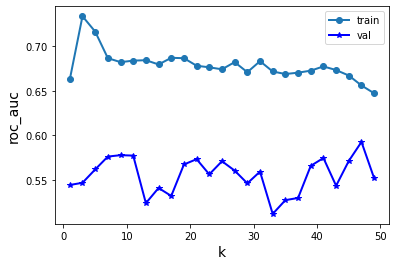

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.592
Valor correspondiente para el hiperparámetro: {'n_neighbors': 47}
0.5121951219512195
Sensibilidad y Accuracy 0.7619047619047619 0.5121951219512195


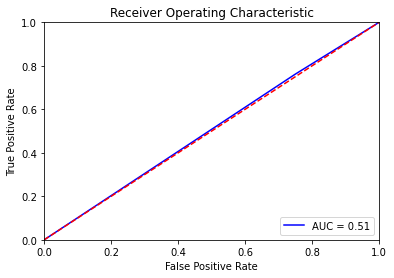

(160, 8) (160,) (41, 8) (41,)


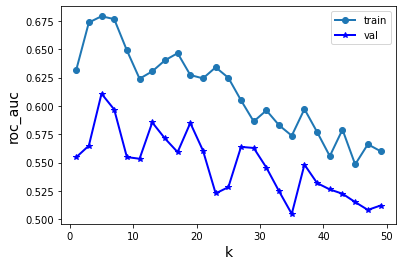

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.611
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.5609756097560976
Sensibilidad y Accuracy 0.6666666666666666 0.5609756097560976


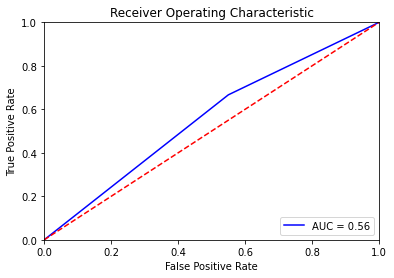

(160, 8) (160,) (41, 8) (41,)


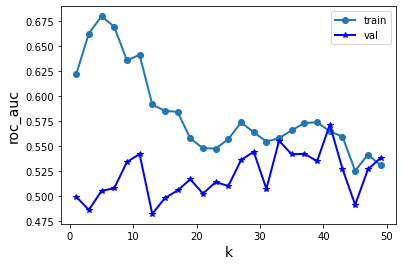

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.571
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.43902439024390244
Sensibilidad y Accuracy 0.3333333333333333 0.43902439024390244


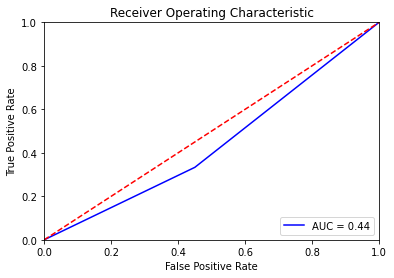

(160, 8) (160,) (41, 8) (41,)


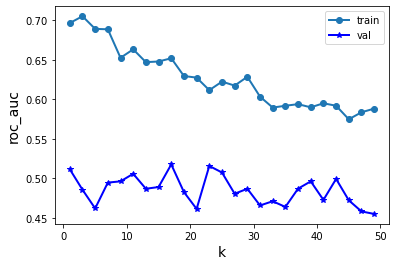

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.517
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5365853658536586
Sensibilidad y Accuracy 0.47619047619047616 0.5365853658536586


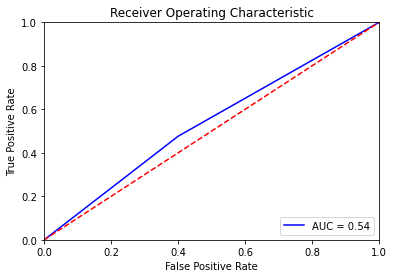

(160, 8) (160,) (41, 8) (41,)


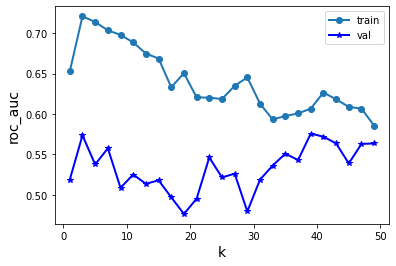

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.576
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.3902439024390244
Sensibilidad y Accuracy 0.47619047619047616 0.3902439024390244


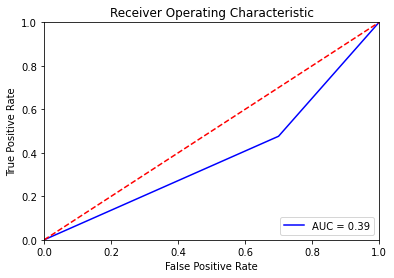

[0.7619047619047619, 0.6666666666666666, 0.3333333333333333, 0.47619047619047616, 0.47619047619047616] [0.5121951219512195, 0.5609756097560976, 0.43902439024390244, 0.5365853658536586, 0.3902439024390244] [0.5059523809523809, 0.5583333333333333, 0.4416666666666667, 0.5380952380952382, 0.38809523809523816]


In [40]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(dataall_4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])



print(sensi, accuracy, roc)

In [41]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model_FS.append("KNN")
mean_FS.append(media_knn)
std_FS.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)



media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2_FS.append("KNN")
mean2_FS.append(media_knn2)
std2_FS.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)

0.48780487804878053 0.07110916944933295
0.4864285714285715 0.07052302980180518


In [42]:
media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.5428571428571428 0.17036708399998396
0.43 0.15247950681976907


# SVC

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)


    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 8) (160,) (41, 8) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.654
0.3902439024390244
[[ 6 14]
 [11 10]]
Sensibilidad y Accuracy 0.47619047619047616 0.3902439024390244


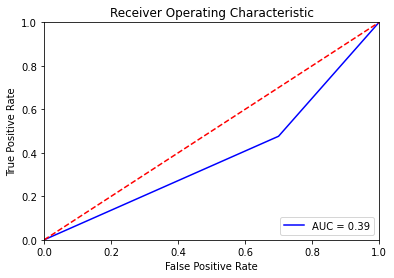

(160, 8) (160,) (41, 8) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.6097560975609756
[[10 10]
 [ 6 15]]
Sensibilidad y Accuracy 0.7142857142857143 0.6097560975609756


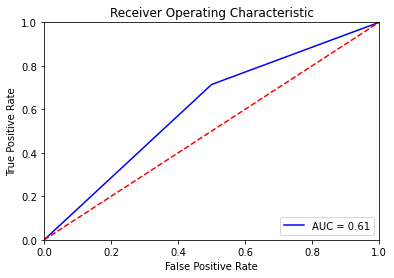

(160, 8) (160,) (41, 8) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.469
0.6341463414634146
[[19  1]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.6341463414634146


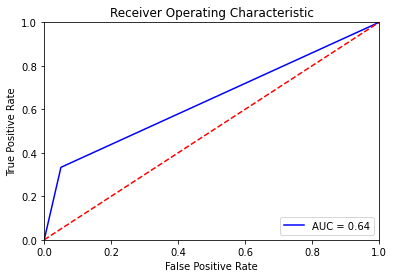

(160, 8) (160,) (41, 8) (41,)
Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.508
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad y Accuracy 0.42857142857142855 0.5609756097560976


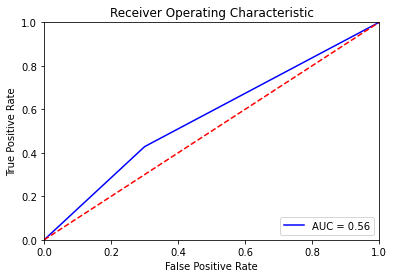

(160, 8) (160,) (41, 8) (41,)
Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.543
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5365853658536586


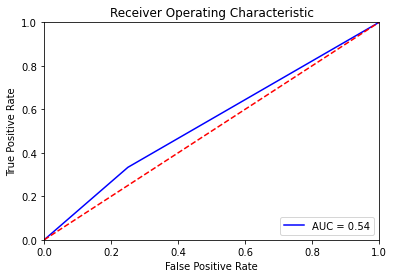

[0.47619047619047616, 0.7142857142857143, 0.3333333333333333, 0.42857142857142855, 0.3333333333333333] [0.3902439024390244, 0.6097560975609756, 0.6341463414634146, 0.5609756097560976, 0.5365853658536586] [0.38809523809523816, 0.6071428571428572, 0.6416666666666666, 0.5642857142857143, 0.5416666666666666]


In [44]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(dataall_4, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])



print(sensi, accuracy, roc)

In [45]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model_FS.append("SVM")
mean_FS.append(media_svc)
std_FS.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2_FS.append("SVM")
mean2_FS.append(media_svc2)
std2_FS.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.5463414634146342 0.09540296202735583
0.5485714285714286 0.09765315896468638
0.45714285714285713 0.15649215928719035
0.64 0.24849547279578352


# Decision Tree

(160, 8) (160,) (41, 8) (41,)
[[ 0.29738086 -1.44115338  0.60623541 ...  0.8819171  -0.42008403
  -0.69388867]
 [-3.36269123  0.69388867 -1.64952424 ...  0.8819171  -0.42008403
  -0.69388867]
 [ 0.29738086 -1.44115338  0.60623541 ... -1.13389342 -0.42008403
  -0.69388867]
 ...
 [ 0.29738086 -1.44115338  0.60623541 ... -1.13389342 -0.42008403
   1.44115338]
 [-3.36269123 -1.44115338  0.60623541 ... -1.13389342 -0.42008403
  -0.69388867]
 [ 0.29738086  0.69388867  0.60623541 ... -1.13389342 -0.42008403
  -0.69388867]]
{'max_depth': 4}


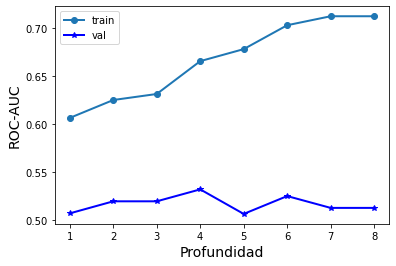

Mejor ROC-AUC en validación cruzada: 0.532
Mejor valor del hiperparámetro: {'max_depth': 4}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4146341463414634
[[ 1 19]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.4146341463414634


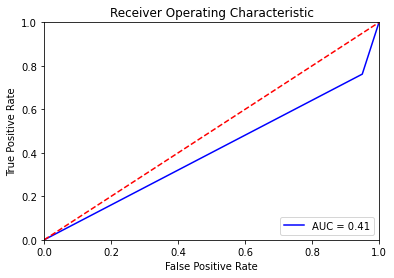

(160, 8) (160,) (41, 8) (41,)
[[ 0.27170849  0.71374643  0.52915026 ... -1.13389342 -0.42008403
  -0.67419986]
 [ 0.27170849  0.71374643  0.52915026 ... -1.13389342 -0.42008403
  -0.67419986]
 [ 0.27170849  0.71374643 -1.88982237 ...  0.8819171  -0.42008403
   1.4832397 ]
 ...
 [ 0.27170849  0.71374643  0.52915026 ...  0.8819171  -0.42008403
   1.4832397 ]
 [ 0.27170849  0.71374643  0.52915026 ...  0.8819171  -0.42008403
   1.4832397 ]
 [ 0.27170849  0.71374643  0.52915026 ...  0.8819171  -0.42008403
  -0.67419986]]
{'max_depth': 2}


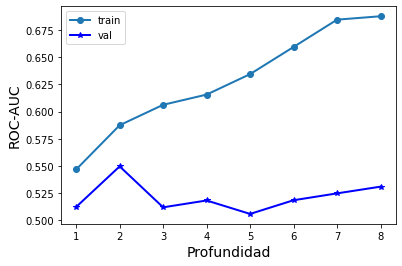

Mejor ROC-AUC en validación cruzada: 0.550
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5121951219512195
[[ 2 18]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.5121951219512195


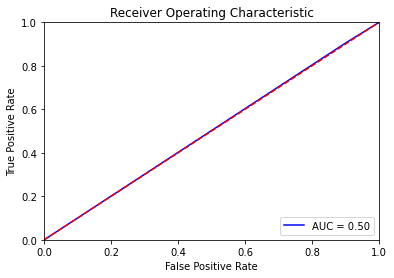

(160, 8) (160,) (41, 8) (41,)
[[ 0.29738086 -1.34425353 -1.76140969 ... -1.         -0.3992747
   1.44115338]
 [ 0.29738086  0.74390729  0.56772709 ... -1.         -0.3992747
  -0.69388867]
 [ 0.29738086 -1.34425353 -1.76140969 ... -1.         -0.3992747
   1.44115338]
 ...
 [ 0.29738086  0.74390729 -1.76140969 ...  1.         -0.3992747
   1.44115338]
 [ 0.29738086  0.74390729 -1.76140969 ...  1.         -0.3992747
  -0.69388867]
 [ 0.29738086  0.74390729  0.56772709 ...  1.         -0.3992747
  -0.69388867]]
{'max_depth': 7}


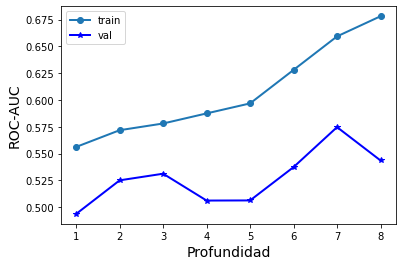

Mejor ROC-AUC en validación cruzada: 0.575
Mejor valor del hiperparámetro: {'max_depth': 7}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6585365853658537
[[17  3]
 [11 10]]
Sensibilidad y Accuracy 0.47619047619047616 0.6585365853658537


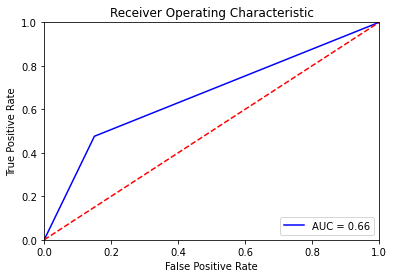

(160, 8) (160,) (41, 8) (41,)
[[ 0.24413654  0.70379479  0.54846423 ... -1.         -0.40973554
  -0.73379939]
 [ 0.24413654 -1.42086872  0.54846423 ... -1.         -0.40973554
  -0.73379939]
 [ 0.24413654 -1.42086872 -1.82327297 ... -1.          2.44059864
  -0.73379939]
 ...
 [ 0.24413654  0.70379479  0.54846423 ...  1.         -0.40973554
   1.36277029]
 [ 0.24413654 -1.42086872  0.54846423 ... -1.         -0.40973554
   1.36277029]
 [ 0.24413654  0.70379479 -1.82327297 ...  1.         -0.40973554
  -0.73379939]]
{'max_depth': 2}


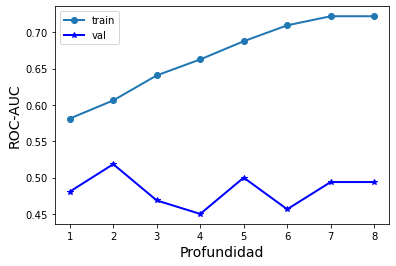

Mejor ROC-AUC en validación cruzada: 0.519
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5853658536585366
[[17  3]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5853658536585366


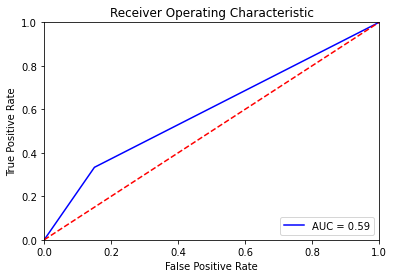

(160, 8) (160,) (41, 8) (41,)
[[ 0.25819889  0.71374643  0.52915026 ... -1.05131497 -0.4404882
   1.4010578 ]
 [ 0.25819889 -1.4010578  -1.88982237 ...  0.95118973 -0.4404882
  -0.71374643]
 [ 0.25819889  0.71374643  0.52915026 ...  0.95118973 -0.4404882
  -0.71374643]
 ...
 [-3.87298335 -1.4010578  -1.88982237 ...  0.95118973 -0.4404882
  -0.71374643]
 [ 0.25819889 -1.4010578   0.52915026 ...  0.95118973  2.27020839
  -0.71374643]
 [ 0.25819889  0.71374643  0.52915026 ...  0.95118973 -0.4404882
  -0.71374643]]
{'max_depth': 1}


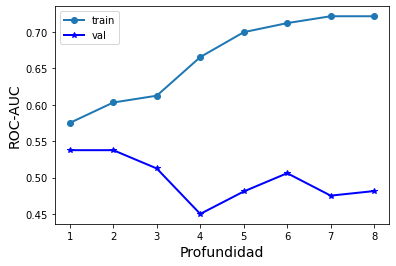

Mejor ROC-AUC en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5365853658536586


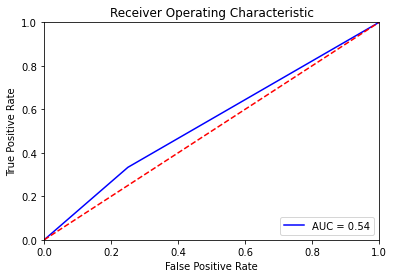

In [46]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(dataall_4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [47]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2_FS.append("DT")
mean2_FS.append(media_log)
std2_FS.append(desviacion_estandar_log)


print(media_log, desviacion_estandar_log)


media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...


model_FS.append("DT")
mean_FS.append(media_sen_logarit)
std_FS.append(desviacion_estandar_sen_logarit)
print(media_sen_logarit, desviacion_estandar_sen_logarit)

media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.540952380952381 0.09644179803468651
0.5414634146341464 0.0902768562113256
0.5619047619047619 0.2595128874940707
0.52 0.408656334834051


# Reg. Logística Lasso

(160, 8) (160,) (41, 8) (41,)
{'C': 1}
0.59375
[[ 7 13]
 [11 10]]
tn: 7, fp:13, fn:11, tp:10
Accuracy: 0.4146341463414634
              precision    recall  f1-score   support

Non-diabetic       0.39      0.35      0.37        20
    Diabetic       0.43      0.48      0.45        21

    accuracy                           0.41        41
   macro avg       0.41      0.41      0.41        41
weighted avg       0.41      0.41      0.41        41

Sensibilidad: 0.47619047619047616


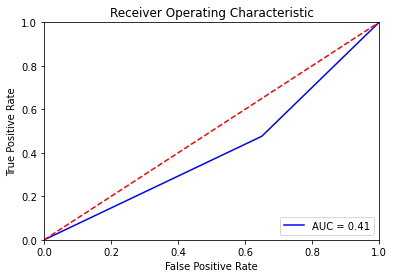

(160, 8) (160,) (41, 8) (41,)
{'C': 1}
0.55625
[[ 7 13]
 [ 3 18]]
tn: 7, fp:13, fn:3, tp:18
Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

Non-diabetic       0.70      0.35      0.47        20
    Diabetic       0.58      0.86      0.69        21

    accuracy                           0.61        41
   macro avg       0.64      0.60      0.58        41
weighted avg       0.64      0.61      0.58        41

Sensibilidad: 0.8571428571428571


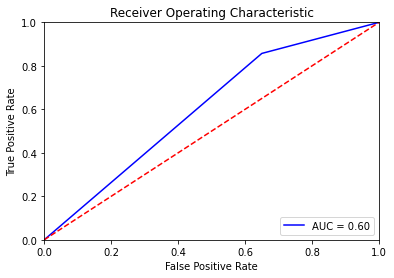

(160, 8) (160,) (41, 8) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


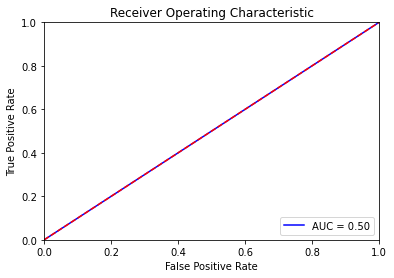

(160, 8) (160,) (41, 8) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


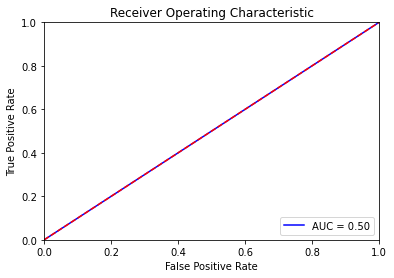

(160, 8) (160,) (41, 8) (41,)
{'C': 1}
0.54375
[[ 6 14]
 [ 3 18]]
tn: 6, fp:14, fn:3, tp:18
Accuracy: 0.5853658536585366
              precision    recall  f1-score   support

Non-diabetic       0.67      0.30      0.41        20
    Diabetic       0.56      0.86      0.68        21

    accuracy                           0.59        41
   macro avg       0.61      0.58      0.55        41
weighted avg       0.61      0.59      0.55        41

Sensibilidad: 0.8571428571428571


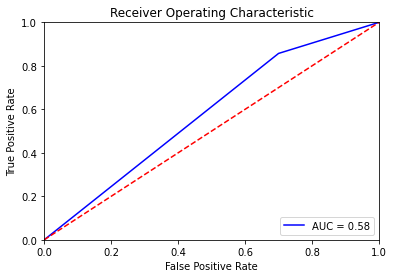

In [51]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(dataall_4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [52]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2_FS.append("LASSO")
mean2_FS.append(media_lasso2)
std2_FS.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

0.5170731707317073 0.07978257187217622
0.5190476190476191 0.07523112535528247
0.4380952380952381 0.4291002028978594


In [53]:

media_lasso4 = statistics.mean(espe) # 7
desviacion_estandar_lasso4 = statistics.stdev(espe) # 5.164...
print(media_lasso4, desviacion_estandar_lasso4)

0.6 0.3657184709581949


In [54]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

In [56]:
def plot_mean_std_metric(df_metrics, lims, metric_name=' ', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()


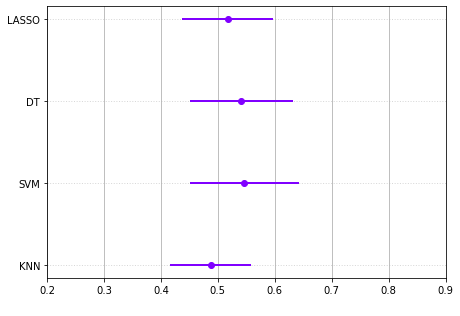

In [58]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)



In [59]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2_FS
df_metrics2["mean"] = mean2_FS
df_metrics2["std"] = std2_FS

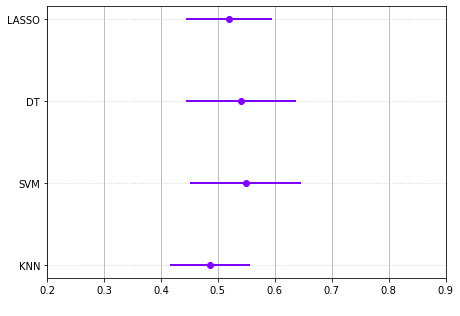

In [61]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)
